# Naive Bayes Implementation

Referencias:
- http://artificiencia.com/aprenda/algoritmo-naive-bayes/
- https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/ (DONE)
- https://hackinganalytics.com/2016/10/13/desvendando-o-classificador-naive-bayes/ (DONE)
- https://towardsdatascience.com/naive-bayes-in-machine-learning-f49cc8f831b4


1. Dado um dataset, calcular probabilidade de cada classe
    - P(Jogar = Sim) = 9/14;
    - p(Jogar = Nao) = 5/14;
2. Calcular probabilidade de cada atributo
    - P(Genero = Sol | Target = Sim) = 2/9;
    - Continua...
    
    
## Dúvidas
R: Sobre o treinamento, o que é o treinamento do Navie Bayes.<br>
R: Treinamento é as `probabilidade condicional`

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('dataset/dataset.csv')

dataset.head(1)

,Genero,Idade,Escolaridade,Profissao,Target
0,F,a - Ate 25 anos,Fundamental,b,0


### Funções auxiliares
- P(A | B):
    - Função auxiliar para fazer `probabilidade condicional`
- P(A):
    - Função auxiliar para fazer `probabilidade condicional`

In [2]:
def p_given_q(ds, p, q, val_p, val_q):
    p_f_zero = ds[(dataset[p]==val_p) & (ds[q]==val_q)][p].count()/ds[p][ds[q]==val_q].count()
    return p_f_zero

def p_q(ds, p,val_p):
    return ds[p][ds[p]==val_p].count()/ds[p].count()

#p_given_q('Weather','Target','sunny',1)

### Probabilidade de Target ser 0 ou 1

In [3]:
# Counters
n_tg_zero = dataset['Target'][dataset['Target']==0].count()
n_tg_one = dataset['Target'][dataset['Target']==1].count()

n_all = dataset['Target'].count()

In [4]:
p_tg_zero = n_tg_zero/n_all
p_tg_one = n_tg_one/n_all

### Listas com possibilidades

In [5]:
#Training

list_columns = list(dataset)
list_columns.pop()
list_value_tg = list(dataset['Target'].unique())
list_results = list()

#for column in list_columns:
#   for value_col in list(dataset[column].unique()):
#       for value_tg in list_value_tg:
#           list_results.append((column+'='+str(value_col)+' dado Target='+ str(value_tg), p_given_q(column,'Target',value_col,value_tg)))
# list_results

### Formula para predições
MAP(h) = max (P (o|h) x P(h))

In [38]:
incorrect = list()
correct = list()

for i in range(0,30):
    print(i)
    ds_train=dataset.sample(frac=(80*i/30+20*(30-i)/30)/100,random_state=i*200).reset_index() # Varia de 20% até 80%
    ds_test=dataset.drop(ds_train.index)

    count_correct = 0
    count_incorrect = 0

    for index, row in ds_test.iterrows():
        classes = list()
        for value_tg in list_value_tg:
            prob = p_q(ds_train,'Target',value_tg)
            for column in list_columns:
                prob *= p_given_q(ds_train,column,'Target',row[column],value_tg)
            classes.append((value_tg, prob))

        #Result
        result = max(classes,key=lambda p: p[1])
        if result[0] == row['Target']:
            count_correct += 1
        else:
            count_incorrect += 1
    correct.append(count_correct)
    incorrect.append(count_incorrect)

0


/Users/syslogg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [39]:
percents = list()

for i in range(0, 30):
    percents.append(correct[i]/(correct[i]+incorrect[i]))

In [40]:

percents

[0.76,
 0.7551282051282051,
 0.756578947368421,
 0.7472972972972973,
 0.7319444444444444,
 0.7585714285714286,
 0.7573529411764706,
 0.7560606060606061,
 0.7609375,
 0.7661290322580645,
 0.7616666666666667,
 0.753448275862069,
 0.7625,
 0.7648148148148148,
 0.7634615384615384,
 0.76,
 0.7583333333333333,
 0.7521739130434782,
 0.7522727272727273,
 0.75,
 0.7525,
 0.7552631578947369,
 0.7583333333333333,
 0.7617647058823529,
 0.75625,
 0.75,
 0.7464285714285714,
 0.7423076923076923,
 0.7458333333333333,
 0.75]

In [41]:

import matplotlib.pyplot as plt

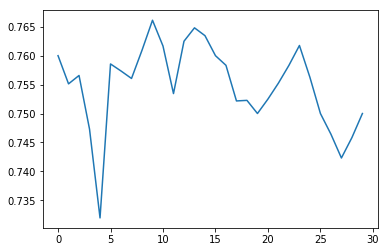

In [42]:
plt.plot(percents)
plt.show()